Import base fire perimeter map

In [4]:
## Note: The following packages must be installed:
# pip install geopandas pandas matplotlib requests jupyter ipykernel contextily

import geopandas as gpd

In [5]:
# initialize the geodataframe, select fire perimeters. For prescribed burns, select "rxburn24_1" instead of "firep24_1"
gdf = gpd.read_file("../data/raw/fire24_1.gdb", layer="firep24_1")
print(gdf.shape) #Geodataframe dimensions
print(gdf.crs) #Coordinate reference system - EPSG 3310 = California Albers projection
print(gdf.columns.tolist())

f:\GeoPandas Projects\ca-wildfire-project\venv\Lib\site-packages\pyogrio\raw.py:200: RuntimeWarning: organizePolygons() received a polygon with more than 100 parts. The processing may be really slow.  You can skip the processing by setting METHOD=SKIP, or only make it analyze counter-clock wise parts by setting METHOD=ONLY_CCW if you can assume that the outline of holes is counter-clock wise defined
  return ogr_read(


(22810, 20)
EPSG:3310
['YEAR_', 'STATE', 'AGENCY', 'UNIT_ID', 'FIRE_NAME', 'INC_NUM', 'IRWINID', 'ALARM_DATE', 'CONT_DATE', 'C_METHOD', 'CAUSE', 'COMPLEX_NAME', 'COMPLEX_ID', 'OBJECTIVE', 'GIS_ACRES', 'COMMENTS', 'FIRE_NUM', 'Shape_Length', 'Shape_Area', 'geometry']


<Axes: >

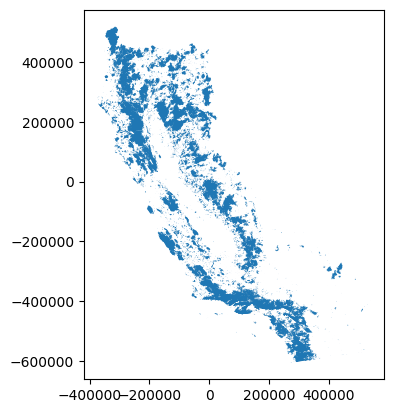

In [6]:
gdf.plot()

Import base map

In [7]:
import contextily as ctx
import matplotlib.pyplot as plt

f:\GeoPandas Projects\ca-wildfire-project\venv\Lib\site-packages\geopandas\geodataframe.py:257: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  super().__setattr__(attr, val)
f:\GeoPandas Projects\ca-wildfire-project\venv\Lib\site-packages\geopandas\geodataframe.py:257: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  super().__setattr__(attr, val)


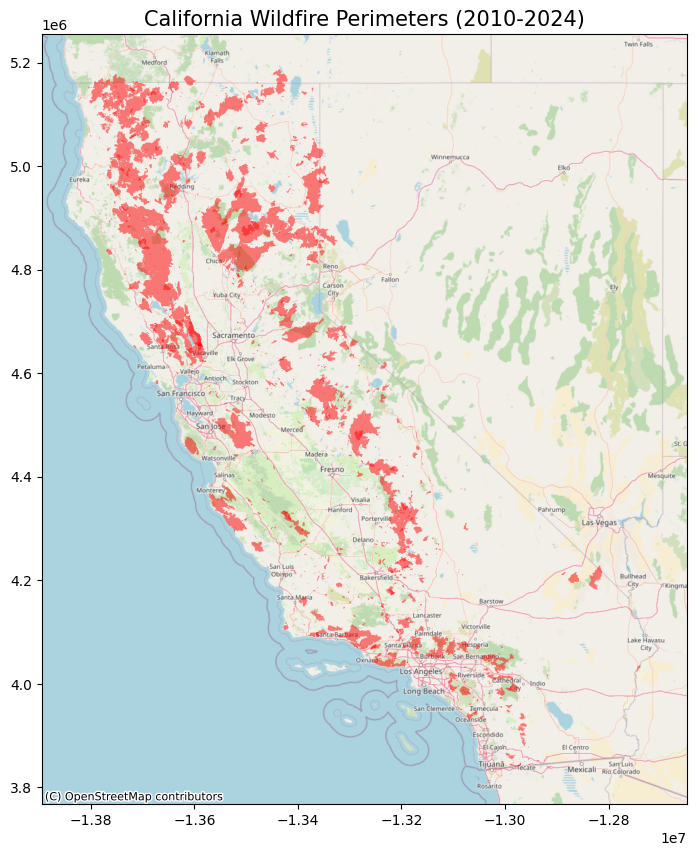

In [8]:
# Filter basemap to 2010 fires and onward
gdf.recent = gdf[gdf['YEAR_'] >= 2010]

# Convert CRS to Web Mercator for contextily basemap
gdf.web = gdf.recent.to_crs(epsg=3857)

# Plot the fire perimeters
fig, ax= plt.subplots(figsize=(10,10))
gdf.web.plot(ax=ax, alpha=0.5, color="red")

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

plt.title("California Wildfire Perimeters (2010-2024)", fontsize=15)
plt.show()

Add interactivity via ipywidgets for quick analyses

In [9]:
# Enter the following into Bash terminal:
# pip install ipywidgets

import ipywidgets as widgets
from IPython.display import display

In [10]:
def plot_year(year):
    gdf_year = gdf[gdf['YEAR_'] == year].to_crs(epsg=3857)
    fig, ax = plt.subplots(figsize=(10,10)) #Initialize new dataset to matching years only, then create new canvas for each year
    gdf_year.plot(ax=ax, alpha=0.5, color="red")
    ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
    plt.title(f"California Wildfire Perimeters - {year}", )
    plt.show()

widgets.interact(plot_year, year=widgets.IntSlider(
    min=2010, max=2024, step=1, value=2010))



interactive(children=(IntSlider(value=2010, description='year', max=2024, min=2010), Output()), _dom_classes=(…

<function __main__.plot_year(year)>

## Create Choropleth Map

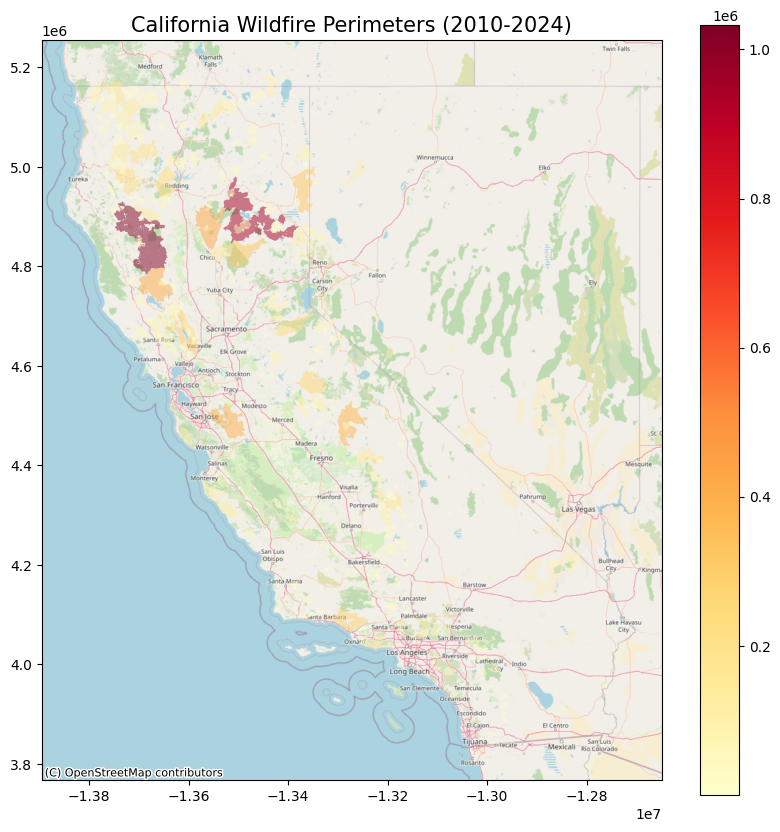

In [26]:
gdf.recent = gdf[gdf['YEAR_'] >= 2010]
gdf.web = gdf.recent.to_crs(epsg=3857)
fig, ax= plt.subplots(figsize=(10,10))

# Changing column output to acreage and mapping to a gradient color scheme
gdf.web.plot(ax=ax, alpha=0.5, column="GIS_ACRES", cmap="YlOrRd", legend=True)

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
plt.title("California Wildfire Perimeters (2010-2024)", fontsize=15)
plt.show()

### Normalize with log scale via Matplotlib with LogNorm

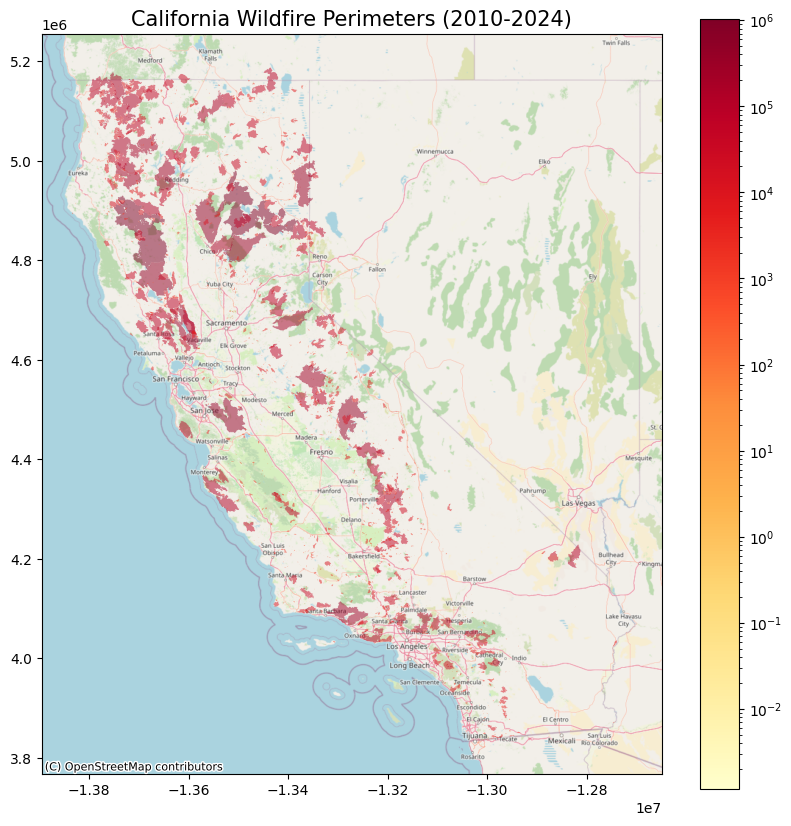

In [32]:
from matplotlib.colors import LogNorm

gdf.recent = gdf[gdf['YEAR_'] >= 2010]
gdf.web = gdf.recent.to_crs(epsg=3857)
fig, ax= plt.subplots(figsize=(10,10))
gdf.web.plot(ax=ax, alpha=0.5, column="GIS_ACRES", cmap="YlOrRd", legend=True,
# Use logarithmic normalization for better color distribution
norm=LogNorm(vmin=gdf.web['GIS_ACRES'].min(), vmax=gdf.web['GIS_ACRES'].max())
)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
plt.title("California Wildfire Perimeters (2010-2024)", fontsize=15)
plt.show()